# Verifica della legge dell'inverso del quadrato per l'intensità luminosa

## Motivazione
Data una sorgente luminosa puntiforme $S$, la teoria fornisce il valore dell'intensità luminosa $I(P)$ in un punto $P$ a distanza $r=\overline{PS}$ dalla sorgente attraverso la relazione $$I=\frac{P}{4\pi r^2}\propto \frac{1}{r^2},$$
dove $P=\frac{\delta E}{\delta t}$ è la potenza erogata dalla sorgente.

Si vuole verificare sperimentalmente la dipendenza dell'intensità luminosa dall'inverso del quadrato della distanza utilizzando sensori di distanza e luminosità collegati ad un software di analisi dati attraverso la piattaforma [arduino](https://www.arduino.cc/).

## Strumentazione
- Arduino UNO
- Sensore di luminosità (LDR) ([datasheet](https://cdn-learn.adafruit.com/downloads/pdf/photocells.pdf))
- Sensore di distanza ad ultrasuoni HC-SR04 ([datasheet](https://www.electroschematics.com/wp-content/uploads/2013/07/HCSR04-datasheet-version-1.pdf))

## Schema del circuito

![schema circuito](./schema.png)

## Codice arduino

Il codice caricato sull'arduino UNO è il seguente.

```C
int photocellPin = A0;
int triggerPin = 7;
int echoPin = 2;

float speedOfSound = 0.034; // cm / microseconds

void setup() {
  pinMode(triggerPin, OUTPUT);
  pinMode(echoPin, INPUT);
  Serial.begin(9600);
}

void loop() {
  float t = millis() / 1000.0; // secondi dall'avvio del programma
  int photocellValue = analogRead(photocellPin); // lettura della fotoresistenza
  float V = photocellValue * 5.0 / 1023.0; // conversione in tensione
  float intensity = V / (5.0 - V) // conversione in intensità adimensionale
  digitalWrite(triggerPin, LOW);
  digitalWrite(triggerPin, HIGH);
  delayMicroseconds(10);
  digitalWrite(triggerPin, LOW);
  float dt = pulseIn(echoPin, HIGH); // lettura del tempo di andata e ritorno del segnale
  float distance = speedOfSound * dt / 2; // calcolo della distanza
  if (distance > 2 && distance < 400) { // controllo che il valore sia nel range di sensibilità
    Serial.print(t);
    Serial.print(" ");
    Serial.print(distance);
    Serial.print(" ");
    Serial.println(intensity);
  }
  delay(100);
}
```

## Analisi dati

Importiamo le librerie necessarie:
- `serial` per la comunicazione arduino-computer,
- `matplotlib` per il plotting dei dati.

In [1]:
%matplotlib notebook

import serial
import matplotlib.pyplot as plt

Inizializziamo la comunicazione seriale arduino-computer e definiamo alcune funzioni di utilità.

In [2]:
ser = serial.Serial('COM3')

def open_serial_comm():
    global ser
    if not ser.is_open:
        ser.open()

def close_serial_comm():
    global ser
    if ser.is_open:
        ser.close()
        
def read_serial_data():
    global ser
    raw_data_line = ser.readline().decode('ascii')
    t, r, I = list(map(lambda x: float(x), raw_data_line.split(' ')))
    return t, r, I

### Test del sensore di intensità luminosa

<IPython.core.display.Javascript object>


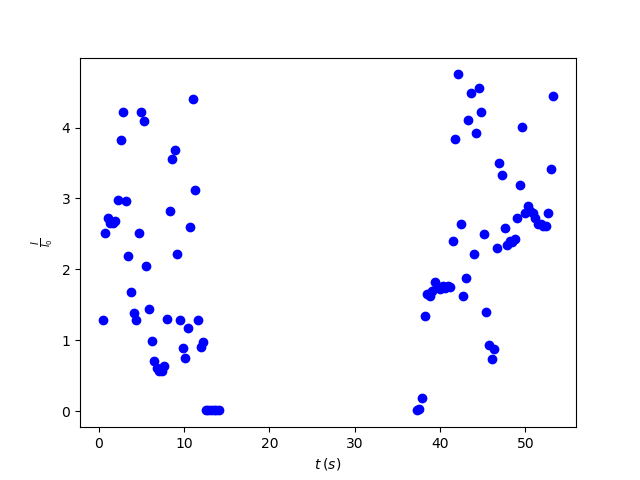

In [3]:
fig = plt.figure('Test sensore di intensità luminosa')
ax = fig.add_subplot(111)
ax.set_xlabel(r'$t\:(s)$')
ax.set_ylabel(r'$\frac{I}{I_0}$')

open_serial_comm()

N = 100

for i in range(N):
    t, r, I = read_serial_data()
    ax.plot(t, I, 'bo')
    fig.canvas.draw()

close_serial_comm()

### Test del sensore di distanza

<IPython.core.display.Javascript object>


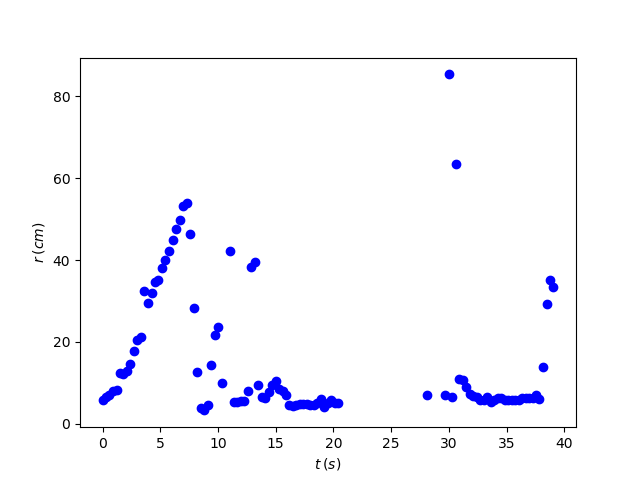

In [4]:
fig = plt.figure('Test sensore di distanza')
ax = fig.add_subplot(111)
ax.set_xlabel(r'$t\:(s)$')
ax.set_ylabel(r'$r\:(cm)$')

open_serial_comm()

N = 100

for i in range(N):
    t, r, I = read_serial_data()
    ax.plot(t, r, 'bo')
    fig.canvas.draw()

close_serial_comm()

### Relazione distanza-intensità

<IPython.core.display.Javascript object>


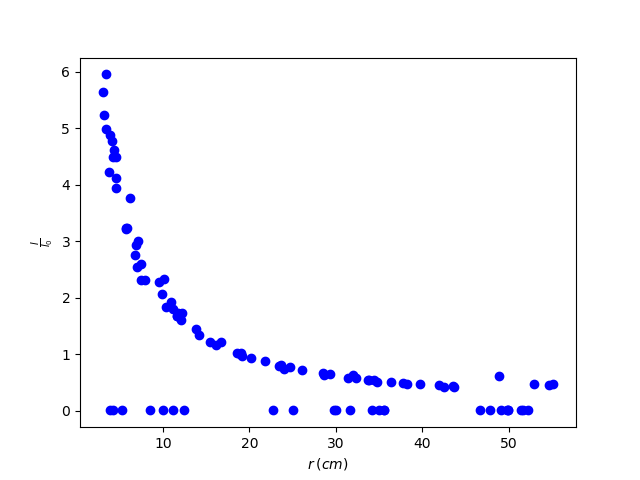

In [5]:
fig = plt.figure('Relazione distanza-intensità')
ax = fig.add_subplot(111)
ax.set_xlabel(r'$r\:(cm)$')
ax.set_ylabel(r'$\frac{I}{I_0}$')

open_serial_comm()

N = 100

for i in range(N):
    t, r, I = read_serial_data()
    ax.plot(r, I, 'bo')
    fig.canvas.draw()

close_serial_comm()

### Linearizzazione della relazione distanza-intensità

<IPython.core.display.Javascript object>


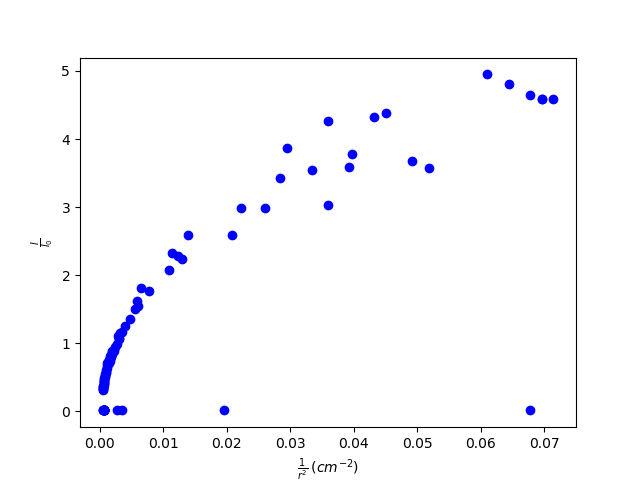

In [6]:
fig = plt.figure('Linearizzazione della relazione distanza-intensità')
ax = fig.add_subplot(111)
ax.set_xlabel(r'$\frac{1}{r^2}\:(cm^{-2})$')
ax.set_ylabel(r'$\frac{I}{I_0}$')

open_serial_comm()

N = 100

for i in range(N):
    t, r, I = read_serial_data()
    ax.plot(1/r**2, I, 'bo')
    fig.canvas.draw()

close_serial_comm()

## Ancora da fare...